In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

%matplotlib inline

# load CHN data
df_chn = pd.read_csv('FDC.csv')

df_chn.head(10)

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190
5,2.25,1,1,610,3.0,980.0,2,"Candy, brownies and soda.","None, i don't eat comfort food. I just eat whe...",4.0,...,1.0,2.0,4,940.0,345,None.,1,2,1315,190
6,3.8,2,1,610,3.0,420.0,2,"Chocolate, ice cream, french fries, pretzels","stress, boredom",1.0,...,1.0,1.0,5,940.0,690,soccer,4,1,1315,180
7,3.3,1,1,720,3.0,420.0,1,"Ice cream, cheeseburgers, chips.",I eat comfort food when im stressed out from s...,1.0,...,1.0,2.0,1,725.0,500,none,4,2,1315,137
8,3.3,1,1,430,NaN,420.0,1,"Donuts, ice cream, chips",Boredom,2.0,...,2.0,2.0,5,725.0,345,none,3,2,760,180
9,3.3,1,1,430,3.0,315.0,2,"Mac and cheese, chocolate, and pasta","Stress, anger and sadness",1.0,...,1.0,1.0,4,580.0,345,field hockey,5,1,900,125


In [15]:
df_chn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           123 non-null    object 
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  106 non-null    float64
 5   calories_scone                124 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  124 non-null    object 
 8   comfort_food_reasons          123 non-null    object 
 9   comfort_food_reasons_coded    106 non-null    float64
 10  cook                          122 non-null    float64
 11  comfort_food_reasons_coded.1  125 non-null    int64  
 12  cuisine                       108 non-null    float64
 13  diet_

In [19]:
cols_to_remove = ['GPA', 'breakfast']
df_chn.drop(cols_to_remove, axis=1, inplace=True)

df_chn.head()

,Gender,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2,430,NaN,315.0,1,none,we dont have comfort,9.0,2.0,9,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,3.0,1,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,1.0,1,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,2.0,2,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,1.0,1,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190


In [21]:
fix_cols = ['calories_scone', 'comfort_food_reasons_coded']

# convert to numeric
df_chn[fix_cols] = df_chn[fix_cols].apply(pd.to_numeric, errors='coerce')

# check if conversion is successful
df_chn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 59 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Gender                        125 non-null    int64  
 1   calories_chicken              125 non-null    int64  
 2   calories_day                  106 non-null    float64
 3   calories_scone                124 non-null    float64
 4   coffee                        125 non-null    int64  
 5   comfort_food                  124 non-null    object 
 6   comfort_food_reasons          123 non-null    object 
 7   comfort_food_reasons_coded    106 non-null    float64
 8   cook                          122 non-null    float64
 9   comfort_food_reasons_coded.1  125 non-null    int64  
 10  cuisine                       108 non-null    float64
 11  diet_current                  124 non-null    object 
 12  diet_current_coded            125 non-null    int64  
 13  drink

In [22]:
df_chn.isna().sum()

,0
Gender,0
calories_chicken,0
calories_day,19
calories_scone,1
coffee,0
comfort_food,1
comfort_food_reasons,2
comfort_food_reasons_coded,19
cook,3
comfort_food_reasons_coded.1,0


In [23]:
df_chn.duplicated().sum()

0

In [24]:
# drop duplicated rows
df_chn.drop_duplicates(inplace=True)

df_chn.duplicated().sum()

0

In [29]:
num_cols = ['calories_scone', 'calories_chicken']

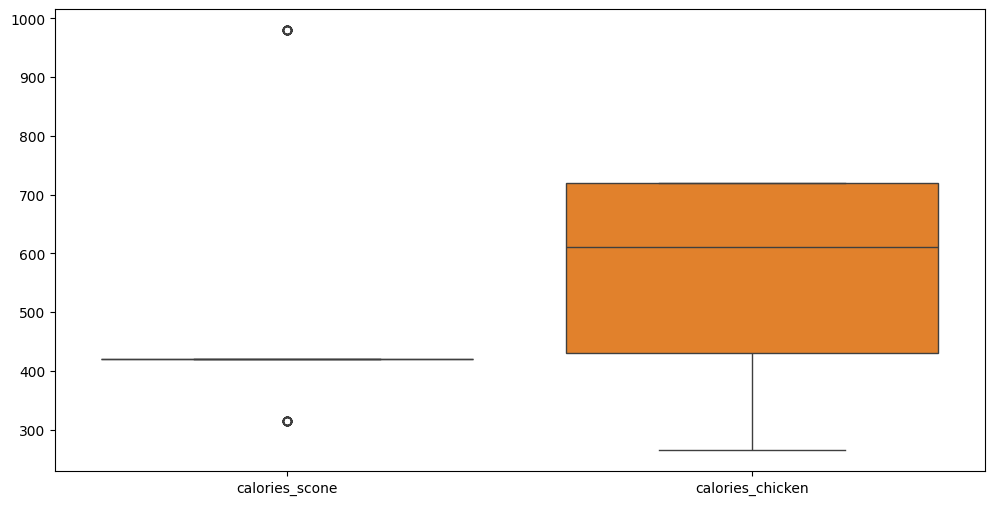

In [30]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_chn[num_cols])
plt.show()

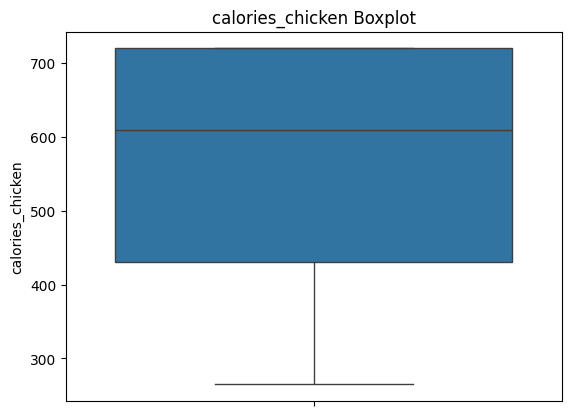

In [31]:
sns.boxplot(data=df_chn['calories_chicken'])
plt.title('calories_chicken Boxplot')
plt.show()

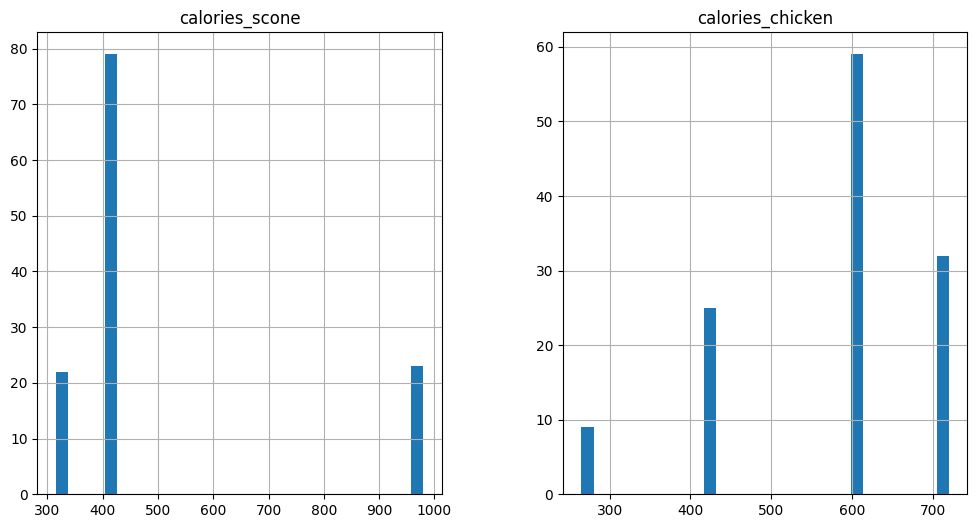

In [32]:
df_chn[num_cols].hist(bins=30, figsize=(12, 6))
plt.show()

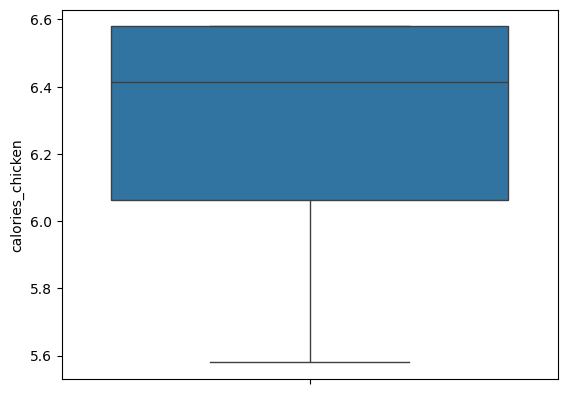

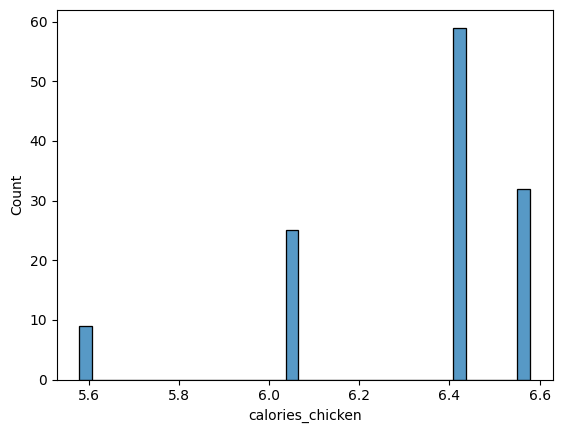

In [33]:
df_chn['calories_chicken'] = np.log(df_chn['calories_chicken'])

sns.boxplot(df_chn['calories_chicken'])
plt.show()

sns.histplot(df_chn['calories_chicken'], bins=35)
plt.show()

In [35]:
# Split data into training and testing sets
X = df_chn.drop('vitamins', axis=1)
y = df_chn['vitamins']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((100, 58), (25, 58), (100,), (25,))

In [36]:
df_chn.isna().sum()

,0
Gender,0
calories_chicken,0
calories_day,19
calories_scone,1
coffee,0
comfort_food,1
comfort_food_reasons,2
comfort_food_reasons_coded,19
cook,3
comfort_food_reasons_coded.1,0


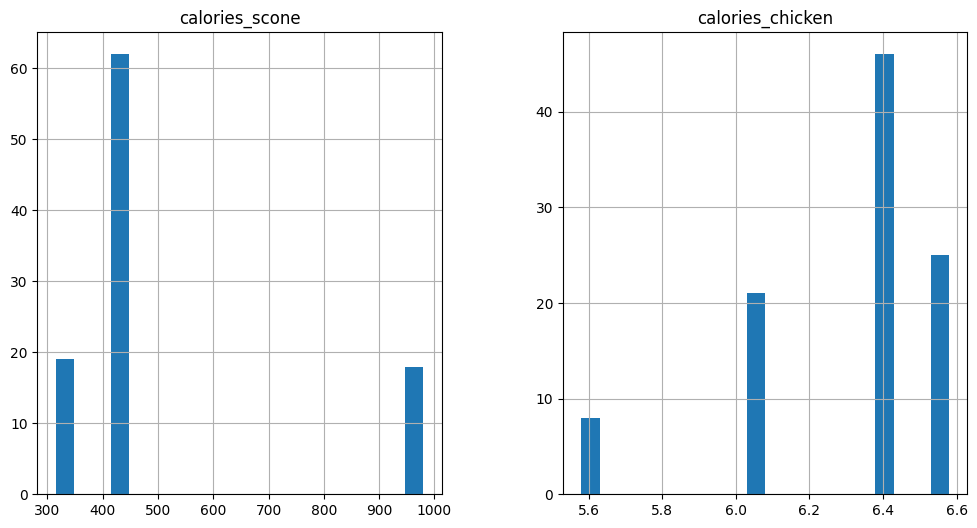

In [37]:
X_train[num_cols].hist(bins=20, figsize=(12, 6))
plt.show()

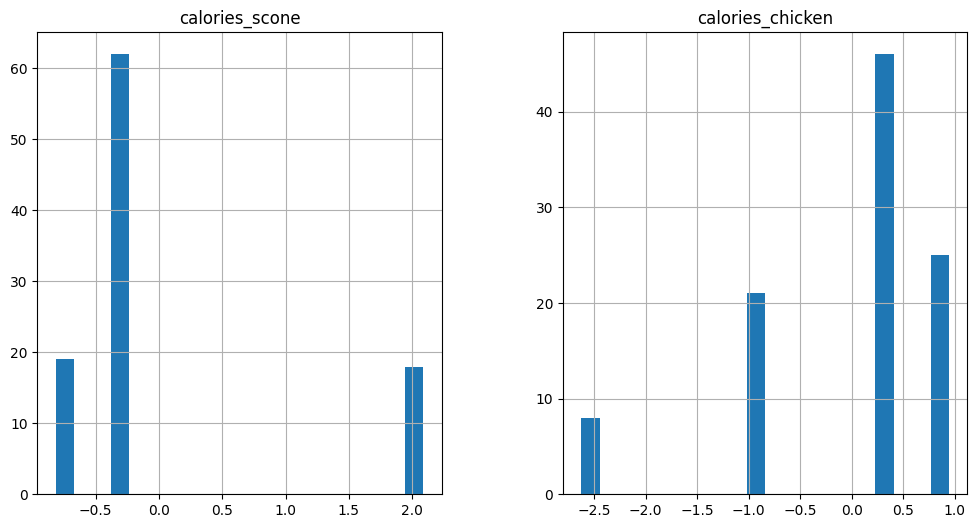

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_train[num_cols].hist(bins=20, figsize=(12, 6))
plt.show()

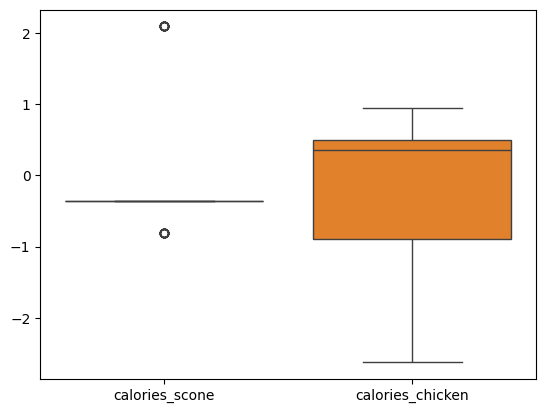

In [39]:
sns.boxplot(data=X_train[num_cols])
plt.show()

In [40]:
X_train.isna().sum() / len(X_train)

,0
Gender,0.00
calories_chicken,0.00
calories_day,0.13
calories_scone,0.01
coffee,0.00
comfort_food,0.01
comfort_food_reasons,0.02
comfort_food_reasons_coded,0.16
cook,0.03
comfort_food_reasons_coded.1,0.00


In [41]:
X_test.isna().sum() / len(X_test)

,0
Gender,0.00
calories_chicken,0.00
calories_day,0.24
calories_scone,0.00
coffee,0.00
comfort_food,0.00
comfort_food_reasons,0.00
comfort_food_reasons_coded,0.12
cook,0.00
comfort_food_reasons_coded.1,0.00


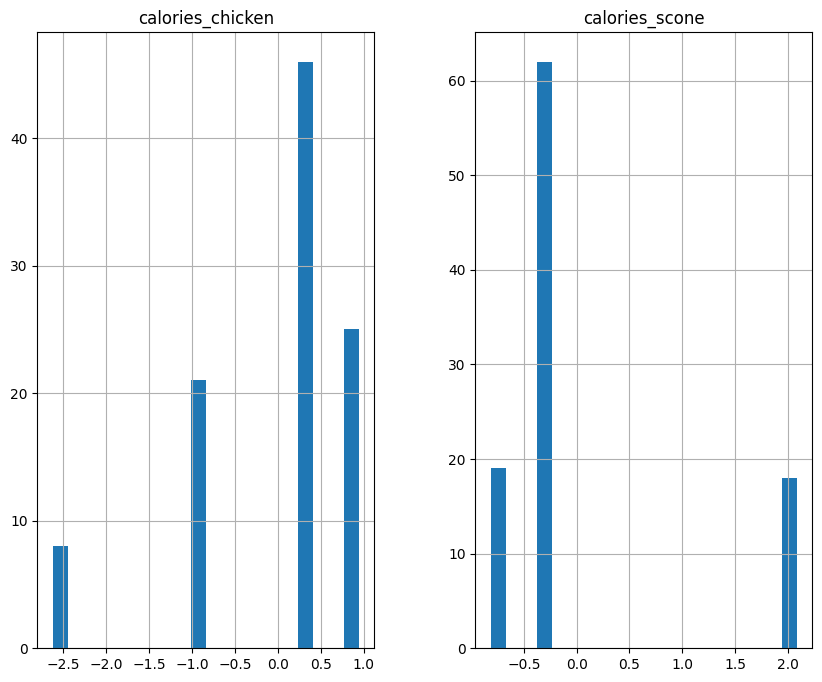

In [47]:
X_train[['calories_chicken', 'calories_scone']].hist(bins=20, figsize=(10, 8))
plt.show()

In [48]:
X_train['calories_chicken'].skew(), X_train['calories_scone'].skew()

(-1.3881690921628096, 1.547160251889591)

In [49]:
X_train['calories_chicken'].fillna(X_train['calories_chicken'].median(), inplace=True)
X_test['calories_chicken'].fillna(X_test['calories_chicken'].median(), inplace=True)

X_train['calories_scone'].fillna(X_train['calories_scone'].mean(), inplace=True)
X_test['calories_scone'].fillna(X_test['calories_scone'].mean(), inplace=True)

X_train.isna().sum() / len(X_train)

,0
Gender,0.00
calories_chicken,0.00
calories_day,0.13
calories_scone,0.00
coffee,0.00
comfort_food,0.01
comfort_food_reasons,0.02
comfort_food_reasons_coded,0.16
cook,0.03
comfort_food_reasons_coded.1,0.00


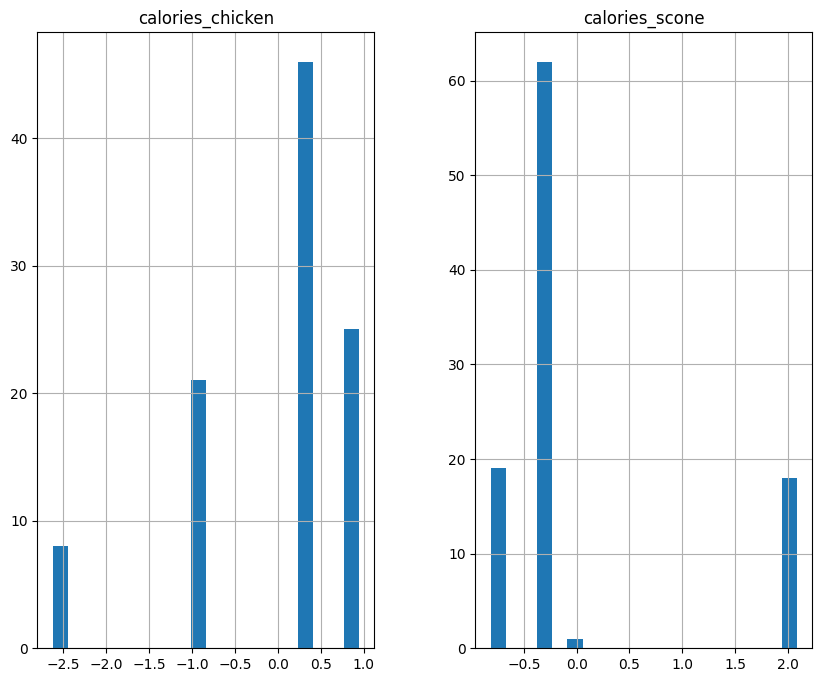

In [50]:
X_train[['calories_chicken', 'calories_scone']].hist(bins=20, figsize=(10, 8))
plt.show()

In [51]:
print(X_test.isna().sum())

Gender                          0
calories_chicken                0
calories_day                    6
calories_scone                  0
coffee                          0
comfort_food                    0
comfort_food_reasons            0
comfort_food_reasons_coded      3
cook                            0
comfort_food_reasons_coded.1    0
cuisine                         3
diet_current                    0
diet_current_coded              0
drink                           0
eating_changes                  1
eating_changes_coded            0
eating_changes_coded1           0
eating_out                      0
employment                      2
ethnic_food                     0
exercise                        2
father_education                0
father_profession               0
fav_cuisine                     0
fav_cuisine_coded               0
fav_food                        0
food_childhood                  0
fries                           0
fruit_day                       0
grade_level   

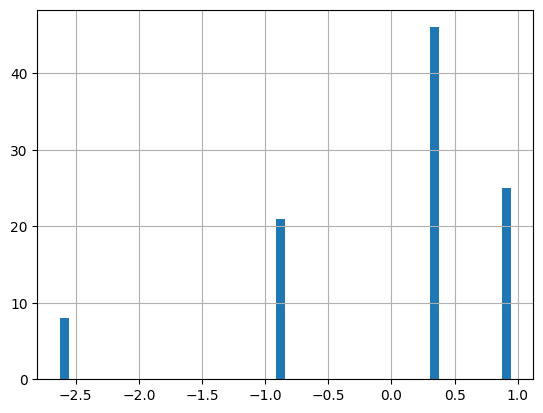

In [53]:
X_train['calories_chicken'].hist(bins=50)
plt.show()